In [ ]:
import os
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random
import shutil
import glob

In [2]:
PATH = os.path.join('datasets','dataset1','bruto')
PATH

'datasets\\dataset1\\bruto'

In [53]:
def parse_anotation(name,folder):
    full_path = os.path.join(PATH,folder, name + '.txt')
    with open(full_path) as f:
        content = f.readlines()
    tipe = content[0].strip().split(': ')[1]
    plate = content[1].strip().split(': ')[1]
    layout = content[2].strip().split(': ')[1]
    corners = content[3].strip().split(': ')[1]
    return tipe, plate, layout, corners

def load_image(name,folder):
    return np.array(Image.open(os.path.join(PATH, folder, name + '.jpg')))

def show_image(img):
    plt.imshow(img)
    plt.axis('off')

def get_corners(anotation):
    tipe, plate, layout, corners = anotation
    corners = [x.split(',') for x in corners.split(' ')]
    return [(int(x[0]), int(x[1])) for x in corners]

def draw_corners(img, corners):
    for i, corner in enumerate(corners):
        cv2.circle(img, corner, 5, (255, 0, 0), -1)
        cv2.putText(img, str(i), corner, cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    return img

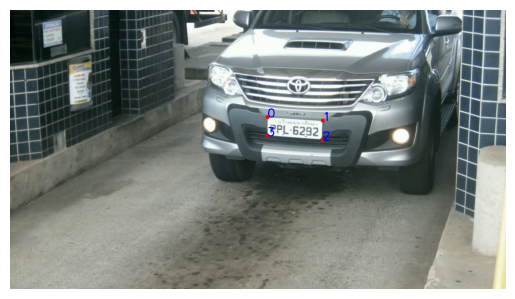

In [54]:
NAME = 'img_004993'
FOLDER = 'cars-br'

img = load_image(NAME,FOLDER)
anot = parse_anotation(NAME, FOLDER)
corners = get_corners(anot)
img = draw_corners(img, corners)
show_image(img)

In [58]:
def coco_anotation(classe,corners,img):
    img_height,img_width,_ = img.shape
    x_values = [x[0] / img_width for x in corners]
    y_values = [y[1] / img_height for y in corners]
    left = min(x_values)
    right = max(x_values)
    top = min(y_values)
    bottom = max(y_values)
    center_x = (left + right) / 2
    center_y = (top + bottom) / 2
    width = right - left
    height = bottom - top
    ann = f'{classe} {center_x} {center_y} {width} {height}'
    for x,y in zip(x_values, y_values):
        ann += f' {x} {y} 2'
    return ann

def draw_bounding_boxes(image, annotation_str):
    result_image = image.copy()
    h, w = image.shape[:2]
    
    for line in annotation_str.strip().split('\n'):
        if line.strip():
            parts = line.split()
            x_center, y_center, width, height = map(float, parts[1:5])
            
            x1 = int((x_center - width/2) * w)
            y1 = int((y_center - height/2) * h)
            x2 = int((x_center + width/2) * w)
            y2 = int((y_center + height/2) * h)
            
            cv2.rectangle(result_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
    return result_image

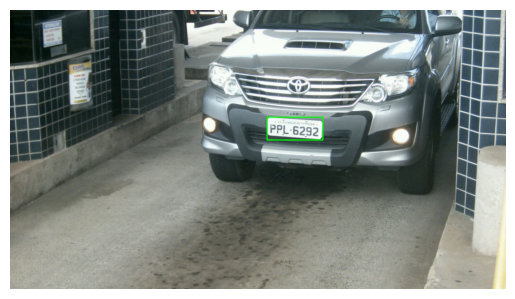

In [59]:
NAME = 'img_004993'
FOLDER = 'cars-br'

img = load_image(NAME,FOLDER)
anot = parse_anotation(NAME, FOLDER)
corners = get_corners(anot)
coco_ann = coco_anotation(0, corners, img)
result = draw_bounding_boxes(img, coco_ann)
show_image(result)

In [60]:
DESTINO = os.path.join('datasets','dataset1','preparado')

classes = {
    'cars-me':0,
    'cars-br':1,
}

folders = list(classes.keys())
dataset = []
for folder in folders:
    for image in os.listdir(os.path.join(PATH, folder)):
        if image.endswith('.jpg'):
            img_path = os.path.join(PATH, folder,image)
            name = image.split('.')[0]
            anot = parse_anotation(name, folder)
            corners = get_corners(anot)
            coco_ann = coco_anotation(classes[folder], corners, img)
            dataset.append((name, img_path, coco_ann))

In [61]:
random.seed(0)
random.shuffle(dataset)
train = dataset[:7 * len(dataset) // 10]
val = dataset[7 * len(dataset) // 10:9 * len(dataset) // 10]
test = dataset[9 * len(dataset) // 10:]

In [62]:
shutil.rmtree(DESTINO)

In [63]:
part = 'train'
labelsdir = os.path.join(DESTINO, 'labels', part)
imagesdir = os.path.join(DESTINO, 'images', part)
os.makedirs(labelsdir,exist_ok=True)
os.makedirs(imagesdir,exist_ok=True)
for item in train:
    shutil.copyfile(item[1], os.path.join(imagesdir, item[0] + '.jpg'))
    with open(os.path.join(labelsdir, item[0] + '.txt'), 'w') as f:
        f.write(item[2])

In [64]:
part = 'val'
labelsdir = os.path.join(DESTINO, 'labels', part)
imagesdir = os.path.join(DESTINO, 'images', part)
os.makedirs(labelsdir,exist_ok=True)
os.makedirs(imagesdir,exist_ok=True)
for item in train:
    shutil.copyfile(item[1], os.path.join(imagesdir, item[0] + '.jpg'))
    with open(os.path.join(labelsdir, item[0] + '.txt'), 'w') as f:
        f.write(item[2])

In [65]:
part = 'test'
labelsdir = os.path.join(DESTINO, 'labels', part)
imagesdir = os.path.join(DESTINO, 'images', part)
os.makedirs(labelsdir,exist_ok=True)
os.makedirs(imagesdir,exist_ok=True)
for item in train:
    shutil.copyfile(item[1], os.path.join(imagesdir, item[0] + '.jpg'))
    with open(os.path.join(labelsdir, item[0] + '.txt'), 'w') as f:
        f.write(item[2])